In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

In [11]:
data_path ="C:/Users/HP/Downloads/Africa-Data-School-1/Assignments/Assignment 5/Data"
os.listdir(data_path)

['test', 'train']

In [12]:
training_path = data_path+'/train'
test_path = data_path+'/test/'
os.listdir(test_path)

['without_mask', 'with_mask']

In [13]:
#random perso with a mask
random_person_withmask = random.choice(os.listdir(training_path+'/with_mask'))
random_person_withmask

'with_mask657.jpeg'

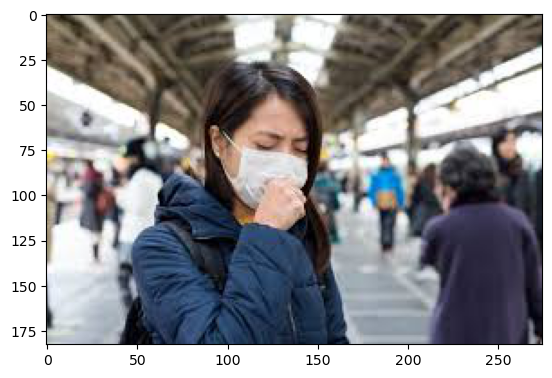

In [14]:
person_mask = training_path+'/with_mask/'+random_person_withmask
plt.imshow(imread(person_mask))

In [15]:
random_person_withoutmask = random.choice(os.listdir(training_path+'/without_mask'))

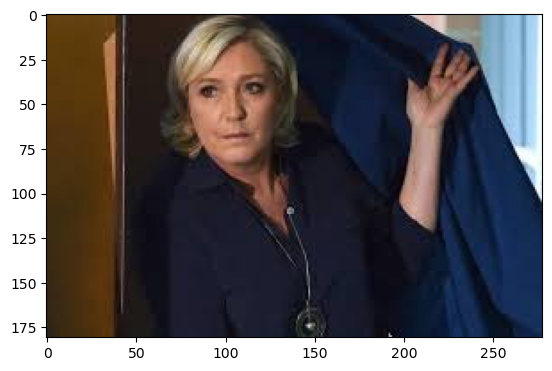

In [16]:
p_without_mask =  training_path+'/without_mask/'+random_person_withoutmask
plt.imshow(imread(p_without_mask))

In [17]:
# with mask training size
len(os.listdir(training_path+'/with_mask'))

1918

In [18]:
# wiithout_mask training size
len(os.listdir(training_path+'/without_mask'))

1918

In [19]:
imread(person_mask).shape

(183, 275, 3)

In [20]:
height=[]
width=[]
for image in os.listdir(test_path+'/without_mask'):
    image = imread(test_path+'/without_mask/'+image)
    h, w, colors = image.shape
    height.append(h)
    width.append(w)


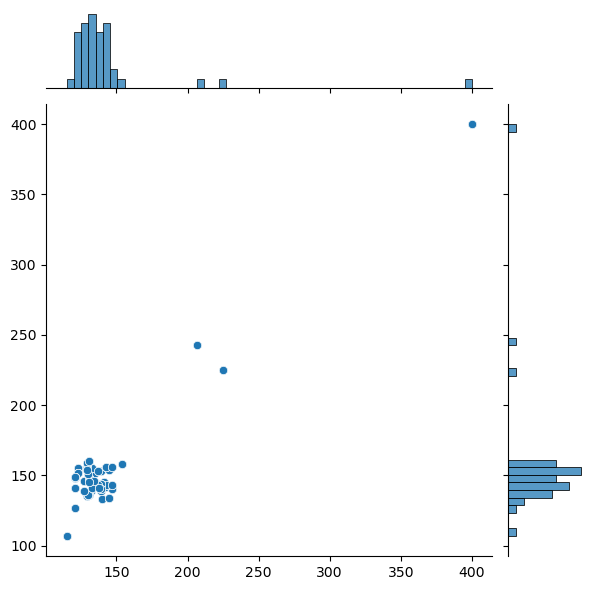

In [21]:
sns.jointplot(x=height, y=width)
plt.show()

In [22]:
np.mean(height)

144.3658536585366

In [23]:
np.mean(width)

156.0121951219512

In [24]:
image_shape = (144, 156, 3)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
image_generator = ImageDataGenerator(rotation_range=20, #Rotate image by 20 degrees
                                     width_shift_range=0.1, #Shift the image width by max of 10%
                                     height_shift_range=0.1, #Shift the image height by max of 10%
                                     rescale=1/255, # Rescale the image by normalizing it
                                     shear_range=0.1, # Shear mean cutting away portion of the image (max 10%)
                                     zoom_range=0.1, # Zoom by max 10%
                                     horizontal_flip=True, # Allow image flipping
                                     fill_mode='nearest' # Fill in the missing pixels with the nearest filled value.
                                    )

In [29]:
image_generator.flow_from_directory(training_path)

Found 3836 images belonging to 2 classes.


In [30]:
image_generator.flow_from_directory(test_path)

Found 328 images belonging to 2 classes.


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Dropout, Flatten

In [32]:
model=Sequential()
# 1st convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))
# 2nd convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))
# 3rd convolutuional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 154, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 141, 153, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 139, 151, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 138, 150, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 136, 148, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 135, 147, 64)     0

In [34]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 154, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 141, 153, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 139, 151, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 138, 150, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 136, 148, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 135, 147, 64)     0

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 154, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 141, 153, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 139, 151, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 138, 150, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 136, 148, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 135, 147, 64)     0

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [39]:
batch_size = 18

In [40]:
train_image_gen = image_generator.flow_from_directory(training_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 3836 images belonging to 2 classes.


In [41]:
test_image_gen = image_generator.flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary')

Found 328 images belonging to 2 classes.


In [42]:
train_image_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [43]:
from tensorflow.keras.models import load_model
model.save('mask_model.h5')

In [44]:
from tensorflow.keras.models import load_model
trained_model = load_model('mask_model.h5')

In [45]:
losses = pd.DataFrame(model.history.history)

AttributeError: 'NoneType' object has no attribute 'history'